In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import torch

In [13]:
with open('saved-subnet-hessian_0116/subnet_eigs.pkl', 'rb') as handle:
    eigs_dict = pickle.load(handle)
with open('saved-subnet-hessian_0116/eig_steps.pkl', 'rb') as handle:
    eigs_steps = pickle.load(handle)
losses = torch.load('saved-subnet-hessian_0116/losses.pt')

In [14]:
def eff_dim(x, s = 1.):
    return (x / (x + s)).sum()

In [64]:
eff_dims = [eff_dim(x[x!=1.], s=1e-2) for x in eigs_dict]

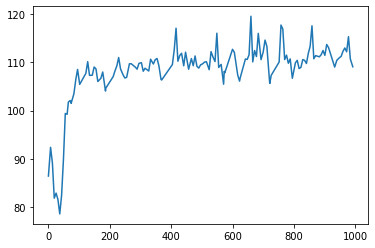

In [65]:
plt.plot(eigs_steps, eff_dims)

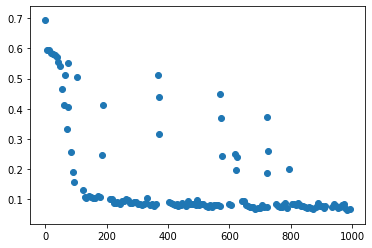

In [66]:
plt.scatter(eigs_steps, losses[eigs_steps])

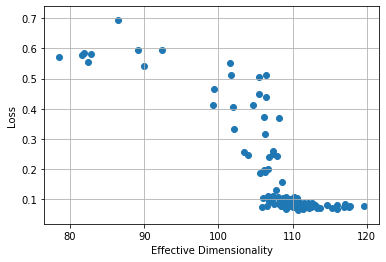

In [68]:
plt.scatter(torch.stack(eff_dims), losses[eigs_steps])
plt.xlabel('Effective Dimensionality')
plt.ylabel('Loss')
plt.grid()